# Word Graph PDF


In [ ]:
!pip install --upgrade pymupdf

In [ ]:
%cd /content/drive/MyDrive/PPW

[Errno 2] No such file or directory: '/content/drive/MyDrive/PPW'
/content


In [ ]:
import pymupdf

doc = pymupdf.open("Dampak-Investasi-Cryptocurrency.pdf") # open a document
out = open("output.txt", "wb") # create a text output
for page in doc: # iterate the document pages
    text = page.get_text().encode("utf8") # get plain text (is in UTF-8)
    out.write(text) # write text of page
    out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
out.close()

In [ ]:
%%capture
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')  # hanya perlu sekali
nltk.download('punkt_tab')  # opsional, untuk versi terbaru NLTK (≥3.8.2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
with open('output.txt', 'r', encoding='utf-8') as file:
    teks = file.read()

print(teks[:200])  # tampilkan 200 karakter pertama

Sanskara Akuntansi dan Keuangan 
Vol. 2, No.02, Januari 2024, hal. 90-99 
ISSN: 2985-7805, DOI: 10.58812/sak.v2i02 
 
 
 
Journal homepage: https://sj.eastasouth-institute.com/index.php/sak 
Analisis 


In [ ]:
# Install: pip install nltk
import nltk


#text = "Ini adalah kalimat pertama. Ini kalimat kedua? Ya!"
sentences = nltk.sent_tokenize(teks)
print(sentences)
# Output: ['Ini adalah kalimat pertama.', 'Ini kalimat kedua?', 'Ya!']

['Sanskara Akuntansi dan Keuangan \nVol.', '2, No.02, Januari 2024, hal.', '90-99 \nISSN: 2985-7805, DOI: 10.58812/sak.v2i02 \n \n \n \nJournal homepage: https://sj.eastasouth-institute.com/index.php/sak \nAnalisis Dampak Investasi Cryptocurrency dan Volatilitas Pasar \nterhadap Profitabilitas Perusahaan Energi di Indonesia \nLoso Judijanto1, Eva Yuniarti Utami2, Erwina Kartika Devi3, Sarmiati4, Eko Sudarmanto5 \n1 IPOSS Jakarta, Indonesia, losojudijantobumn@gmail.com \n2 Universitas Sebelas Maret, eva.yuniarti.utami@staff.uns.ac.id \n3 STIE Syariah Al-Mujaddid, erwinaelkhalifi@gmail.com \n4 STIE Syariah Al-Mujaddid, amisarmiati95@gmail.com \n5 Universitas Muhammadiyah Tangerang, ekosudarmanto.umt@gmail.com \nArticle Info \n \nABSTRAK  \nArticle history: \nReceived Jan, 2024 \nRevised Jan, 2024 \nAccepted Jan, 2024 \n \n \nPenelitian ini menyelidiki dampak investasi mata uang kripto dan \nvolatilitas pasar terhadap profitabilitas perusahaan energi di Indonesia \nmelalui analisis kuanti

In [ ]:
import pandas as pd
df = pd.DataFrame(sentences, columns=['kalimat'])
print(df)

                                               kalimat
0               Sanskara Akuntansi dan Keuangan \nVol.
1                         2, No.02, Januari 2024, hal.
2    90-99 \nISSN: 2985-7805, DOI: 10.58812/sak.v2i...
3    Penelitian ini melibatkan sampel sebanyak \n20...
4    Analisis model pengukuran menetapkan validitas...
..                                                 ...
295             Munich Personal RePEc Archive, 118244.
296  Siwy, F. I. D., Dharmawan, M. S., & Mayatopani...
297  Penggunaan Metode AHP dalam Menentukan \nCrypt...
298  JTIM : Jurnal Teknologi Informasi Dan Multimed...
299             https://doi.org/10.35746/jtim.v5i2.321

[300 rows x 1 columns]


In [ ]:
df.to_csv('kalimat.csv', index=False, encoding='utf-8')

Untuk membuat word graph

Lanjutkan dengan menggunakan https://www.geeksforgeeks.org/nlp/co-occurence-matrix-in-nlp/

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import numpy as np
import pandas as pd

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# ==== BACA FILE CSV ====
df = pd.read_csv("kalimat.csv")

# Ambil semua teks dalam satu string
text = " ".join(df.iloc[:,0].astype(str))

# Preprocess the text
# Menggunakan stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))
words = word_tokenize(text.lower())
words = [word for word in words if word.isalnum() and not word.isdigit() and word not in stop_words]

# Define the window size for co-occurrence
window_size = 2

# Create a list of co-occurring word pairs
co_occurrences = defaultdict(Counter)
for i, word in enumerate(words):
    for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
        if i != j:
            co_occurrences[word][words[j]] += 1

# Create a list of unique words
unique_words = list(set(words))

# Initialize the co-occurrence matrix
co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

# Populate the matrix
word_index = {word: idx for idx, word in enumerate(unique_words)}
for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        co_matrix[word_index[word]][word_index[neighbor]] = count

# DataFrame output
co_matrix_df = pd.DataFrame(co_matrix, index=unique_words, columns=unique_words)
co_matrix_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,melibatkan,pemancar,sisi,rahyuda,industrial,i,in,law,manajemen,sharia,...,memperluas,menengah,loso,regulasi,berbeda,fokus,pemain,hair,securities,nam
melibatkan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pemancar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sisi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rahyuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
industrial,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fokus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pemain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hair,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
securities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import networkx as nx
arr = co_matrix_df.to_numpy()
G=nx.from_numpy_array(arr)

In [ ]:
%%capture
!pip install networkx

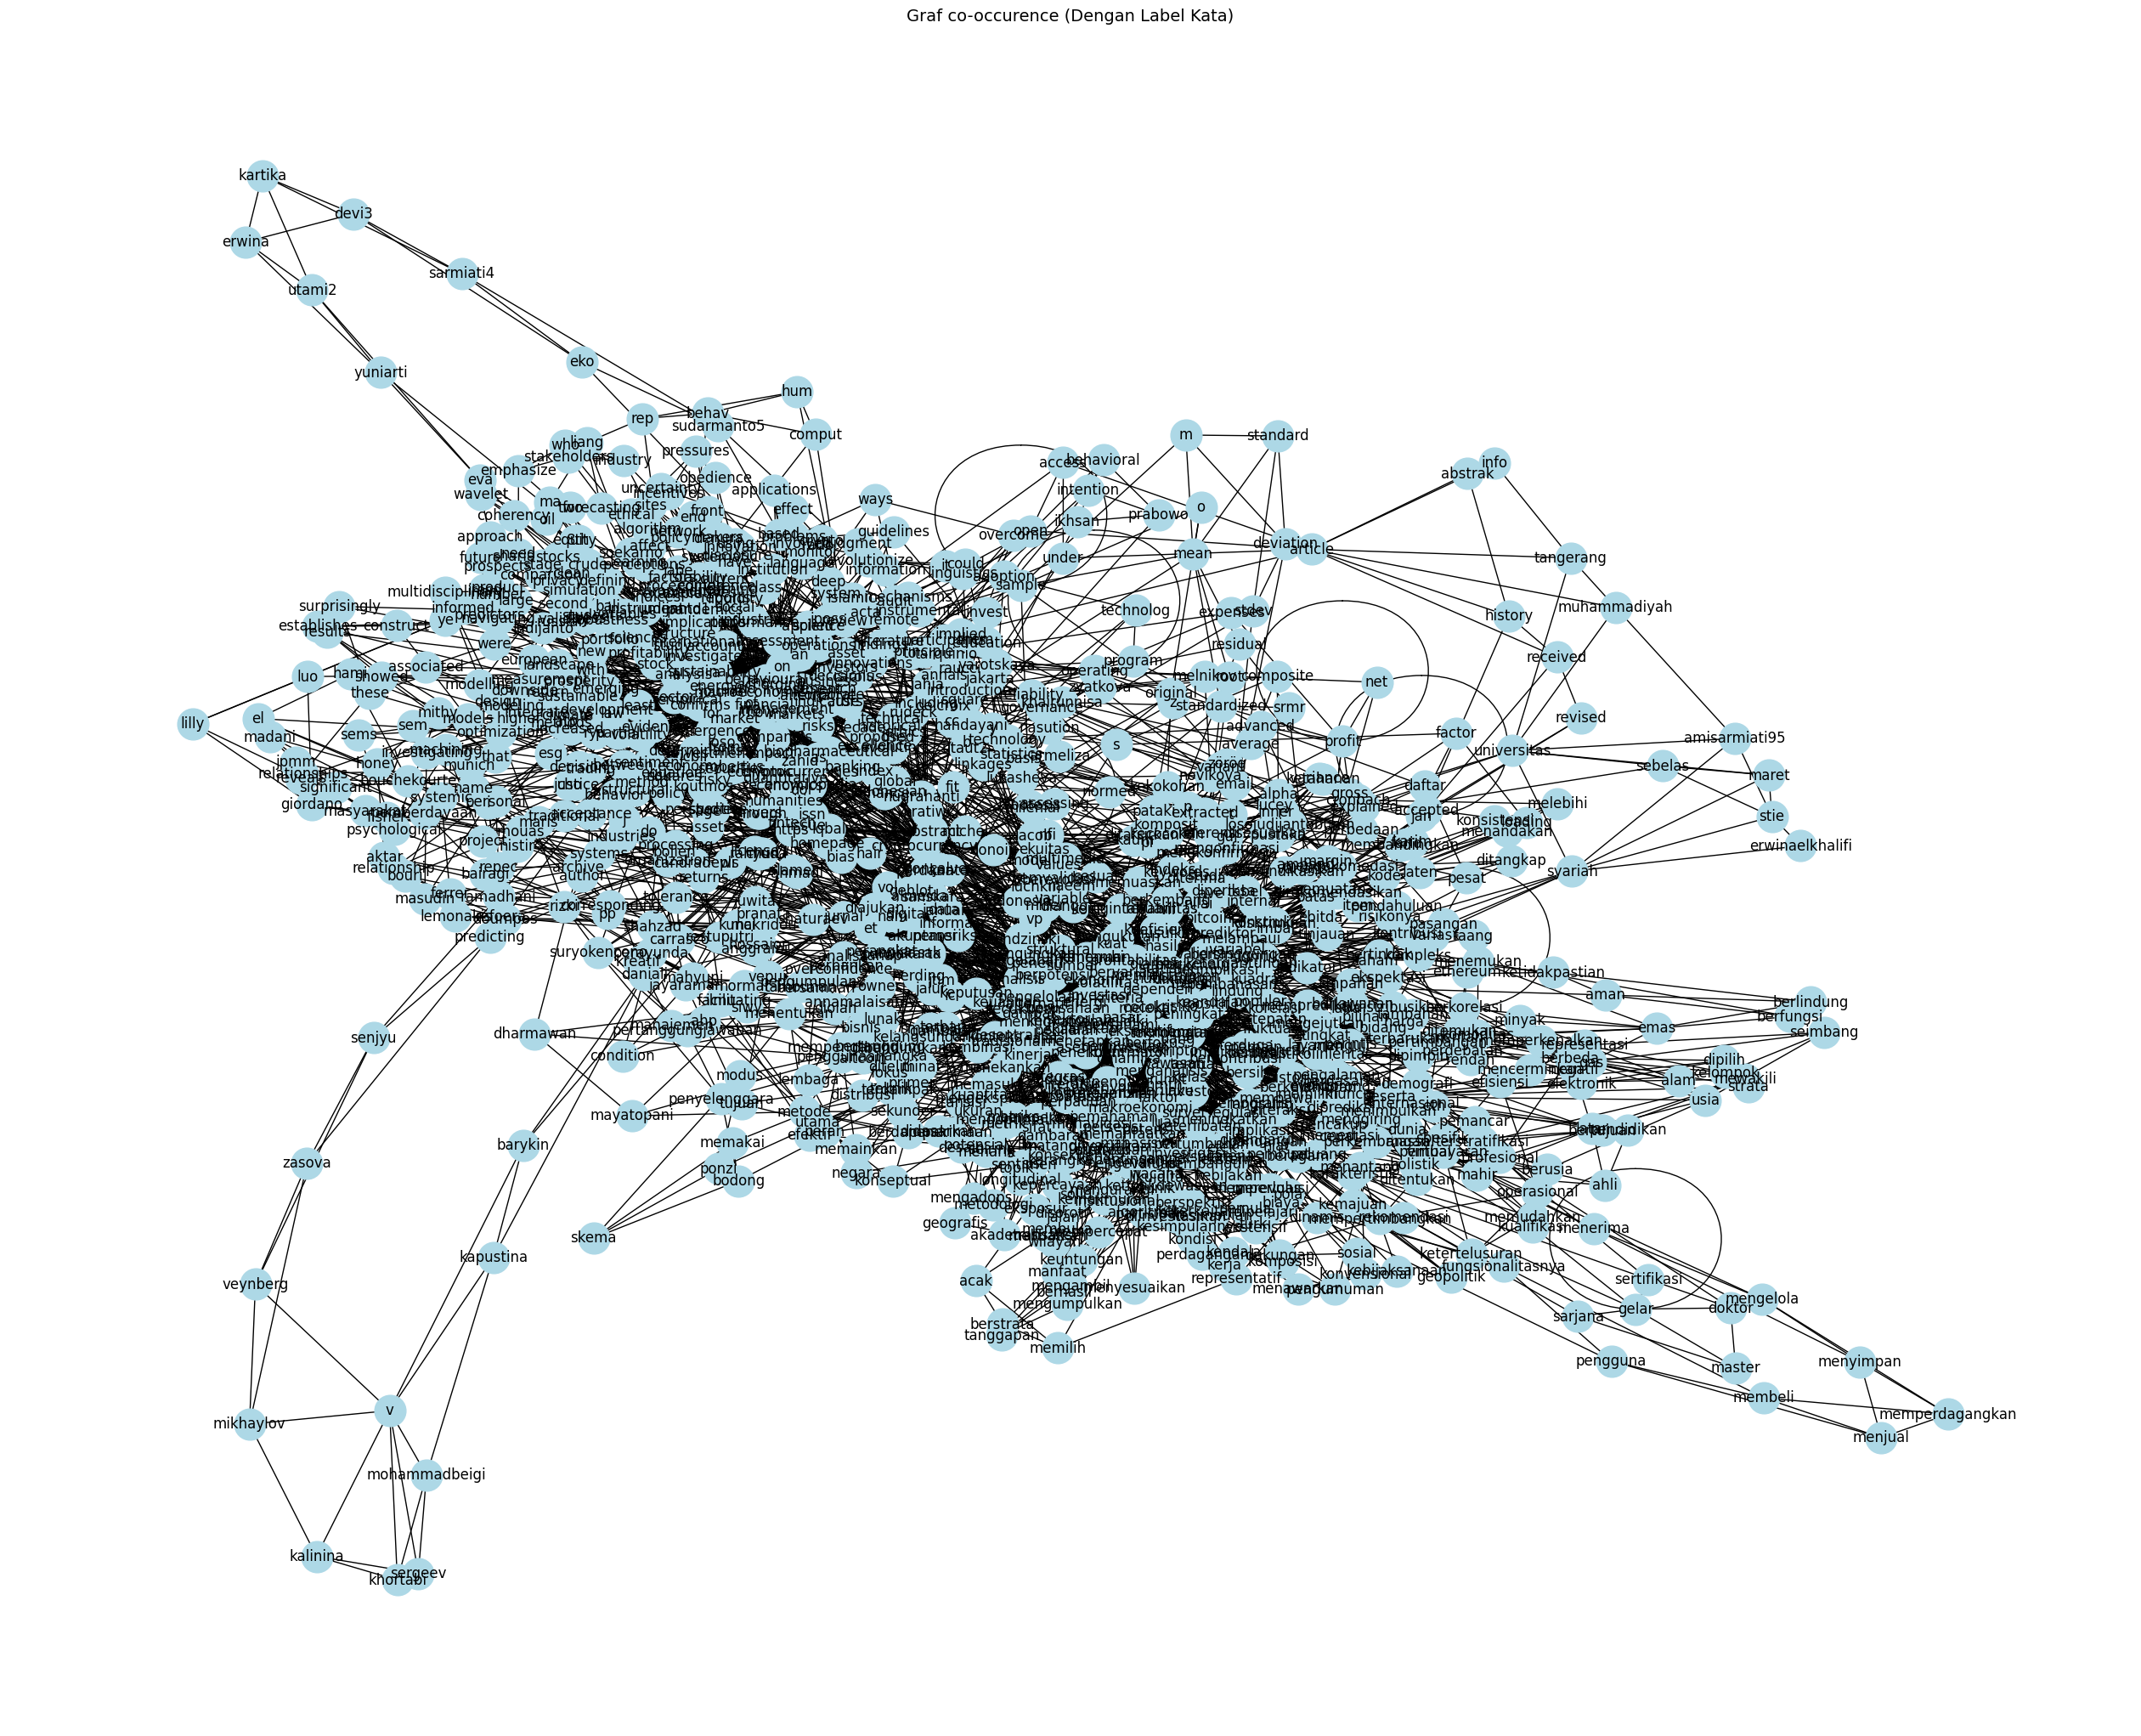

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a dictionary to map node indices back to words
labels = {i: word for i, word in enumerate(unique_words)}

plt.figure(figsize=(25, 20))
nx.draw(G, labels=labels, with_labels=True, node_color='lightblue', node_size=700, font_size=12)
plt.title("Graf co-occurence (Dengan Label Kata)", fontsize=14)
plt.show()

In [ ]:
print(f"Jumlah kata (nodes) dalam graf: {G.number_of_nodes()}")

Jumlah kata (nodes) dalam graf: 992
